Go to Anaconda Prompt and type:
conda install quandl
conda install pandas-datareader

In [1]:
import pandas as pd
import numpy as np
import quandl
import datetime

In [2]:
start = datetime.datetime(2016,1,1)
end = datetime.date.today()
end

datetime.date(2019, 1, 26)

In [7]:
apple = quandl.get("WIKI/"+"AAPL",
                   start_date=start,
                   end_date=end)

micro, google = (quandl.get("WIKI/" + s,
                           start_date=start,
                           end_date=end)
                for s in ["MSFT","GOOG"])
micro.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2016-01-04,54.32,54.8000,53.39,54.80,53777963.0,0.0,1.0,51.724533,52.181598,50.838969,52.181598,53777963.0
2016-01-05,54.93,55.3900,54.54,55.05,34079674.0,0.0,1.0,52.305386,52.743407,51.934021,52.419653,34079674.0
2016-01-06,54.32,54.4001,53.64,54.05,39518863.0,0.0,1.0,51.724533,51.800805,51.077024,51.467434,39518863.0
2016-01-07,52.70,53.4850,52.07,52.17,56564852.0,0.0,1.0,50.181938,50.929430,49.582040,49.677262,56564852.0
2016-01-08,52.37,53.2800,52.15,52.33,48753969.0,0.0,1.0,49.867706,50.734225,49.658218,49.829617,48753969.0


In [8]:
stocks = pd.DataFrame({"APPL":apple["Adj. Close"],
                      "GOOG":google["Adj. Close"],
                      "MSFT":micro["Adj. Close"]})
stocks.tail()

,APPL,GOOG,MSFT
Date,,,
2018-03-21,171.270,1090.88,92.48
2018-03-22,168.845,1049.08,89.79
2018-03-23,164.940,1021.57,87.18
2018-03-26,172.770,1053.21,93.78
2018-03-27,168.340,1005.10,89.47


In [10]:
stock_return = stocks.apply(lambda x: x / x[0]) # df.apply(arg) apply the function arg to each column in df
stock_chg = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1)))
stock_return.head(),stock_chg.head()

(                APPL      GOOG      MSFT
 Date                                    
 2016-01-04  1.000000  1.000000  1.000000
 2016-01-05  0.974941  1.000998  1.004562
 2016-01-06  0.955861  1.002399  0.986314
 2016-01-07  0.915520  0.979173  0.952007
 2016-01-08  0.920361  0.963105  0.954927,
                 APPL      GOOG      MSFT
 Date                                    
 2016-01-04       NaN       NaN       NaN
 2016-01-05 -0.025379  0.000997  0.004552
 2016-01-06 -0.019764  0.001400 -0.018332
 2016-01-07 -0.043121 -0.023443 -0.035402
 2016-01-08  0.005274 -0.016546  0.003062)

In [29]:
apple[apple.Signal!=0].iloc[:,[10,15,16]]  # showing rows with signal & showing only needed columns

,Adj. Close,Regime,Signal
Date,,,
2016-01-04,101.783763,0,NaN
2016-02-03,93.088425,-1,-1.0
2016-02-19,93.288404,1,1.0
2016-04-21,102.933904,-1,-1.0
2016-05-24,95.676455,1,1.0
2016-06-16,95.334404,-1,-1.0
2016-07-11,94.777350,1,1.0
2016-08-30,104.150222,-1,-1.0
2016-09-15,113.553219,1,1.0


In [30]:
apple_signals

,Price,Regime,Signal
Date,,,
2016-02-03,93.088425,-1,Sell
2016-02-19,93.288404,1,Buy
2016-04-21,102.933904,-1,Sell
2016-05-24,95.676455,1,Buy
2016-06-16,95.334404,-1,Sell
2016-07-11,94.777350,1,Buy
2016-08-30,104.150222,-1,Sell
2016-09-15,113.553219,1,Buy
2016-10-31,111.558644,-1,Sell


In [14]:
apple_long_profits

,Price,Profit,End Date,Low
Date,,,,
2016-02-19,93.288404,9.645500,2016-04-21,90.646333
2016-05-24,95.676455,-0.342051,2016-06-16,93.888019
2016-07-11,94.777350,9.372872,2016-08-30,94.230069
2016-09-15,113.553219,-1.994575,2016-10-31,109.603371
2016-11-23,109.856147,-1.264190,2016-12-06,106.912954
2016-12-08,110.735154,29.172321,2017-04-13,109.233928
2017-04-26,142.487208,5.890756,2017-06-09,142.109493
2017-07-13,147.172854,12.477146,2017-09-13,144.852269
2017-10-11,156.550000,14.500000,2017-12-01,155.020000


In [9]:
apple["1W"] = apple["Adj. Close"].rolling(window = 5, center = False).mean() # 5-days moving average
apple["1M"] = apple["Adj. Close"].rolling(window = 22, center = False).mean()
apple["1W-1M"] = apple["1W"] - apple["1M"]
apple["Regime"] = np.where(apple["1W-1M"]>0,1,0) # "where" is vectorized if-else
apple["Regime"] = np.where(apple["1W-1M"]<0,-1,apple["Regime"])
apple["Signal"] = np.sign(apple["Regime"] - apple["Regime"].shift(1)) # Trading signals appear at regime changes
apple["Signal"].value_counts()

apple_signals = pd.concat([
                            pd.DataFrame({"Price":apple.loc[apple["Signal"]==1,"Adj. Close"],
                                          "Regime":apple.loc[apple["Signal"]==1,"Regime"],
                                          "Signal":"Buy"}),
                            pd.DataFrame({"Price":apple.loc[apple["Signal"]==-1,"Adj. Close"],
                                          "Regime":apple.loc[apple["Signal"]==-1,"Regime"],
                                          "Signal":"Sell"})
                        ])
apple_signals.sort_index(inplace=True)

apple_long_profits = pd.DataFrame({
                            "Price": apple_signals.loc[(apple_signals["Signal"]=="Buy") &
                                                      (apple_signals["Regime"]==1),
                                                      "Price"],
                            "Profit": pd.Series(apple_signals["Price"]-apple_signals["Price"].shift(1)).loc[
                                                        apple_signals.loc[(apple_signals["Signal"].shift(1)=="Buy") & 
                                                                          (apple_signals["Regime"].shift(1)==1)].index
                                                                    ].tolist(),
                            "End Date": apple_signals["Price"].loc[
                                                apple_signals.loc[(apple_signals["Signal"].shift(1)=="Buy") &
                                                                  (apple_signals["Regime"].shift(1)==1)].index
                                                                 ].index
                                 })
trade_periods = pd.DataFrame({"Start": apple_long_profits.index,
                             "End": apple_long_profits["End Date"]})
apple_long_profits["Low"] = trade_periods.apply(lambda x: min(apple.loc[x["Start"]:x["End"],"Adj. Low"]), axis =1)
# for comparison
apple[apple.Signal!=0].iloc[:,[10,15,16]]  # showing rows with signal & showing only needed columns


cash = 1000000
apple_backtest = pd.DataFrame[{"Start Port Value":[],
                              "End Port Value":[],
                              "End Date":[],
                              "Shares":[],
                              "Share Price":[],
                              "Trade Value":[],
                              "Profit per Share":[],
                              "Total Profit":[],
                              "Stop-Loss Triggered":[]}]
port_value = .1 # max proportion of pf bet on any trade
batch = 100 # number of shares bought per batch
stoploss = .2 # % of trade loss, that would trigger a stoploss

for index, row in apple_long_profits.iterrows(): # iterating across rows of dataframe
    batches = np.floor(cash*port_value)//np.ceil(batch*row["Price"]) # Max number of batches of stocks invested in
    trade_val = batches * batch * row["Price"] #how much is put with each trade
    if row["Low"] < (1-stoploss)*row["Price"]: # Accout for the stop-loss
        share_profit=(1-stoploss)*row["Price"]
        stop_trig=True
    else:
        share_profit = row["Profit"]
        stop_trig=False
    profit = share_profit * batches * batch
    apple_backtest = apple_backtest.append(pd.DataFrame({
                                                    "Start Port Value": cash,
                                                    "End Port Value": cash+profit,
                                                    "End Date": row["End Date"],
                                                    "Shares": batch*batches,
                                                    "Share Price": row["Price"],
                                                    "Trade Value": trade_val,
                                                    "Profit per Share": share_profit,
                                                    "Total Profit": profit,
                                                    "Stop-Loss Triggered": stop_trig
                                            }, index = [index]))
    cash = max(0,cash+profit)
    


C:\Users\oanuf\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sign
  


,Price,Profit,End Date,Low
Date,,,,
2016-02-19,93.288404,9.645500,2016-04-21,90.646333
2016-05-24,95.676455,-0.342051,2016-06-16,93.888019
2016-07-11,94.777350,9.372872,2016-08-30,94.230069
2016-09-15,113.553219,-1.994575,2016-10-31,109.603371
2016-11-23,109.856147,-1.264190,2016-12-06,106.912954
2016-12-08,110.735154,29.172321,2017-04-13,109.233928
2017-04-26,142.487208,5.890756,2017-06-09,142.109493
2017-07-13,147.172854,12.477146,2017-09-13,144.852269
2017-10-11,156.550000,14.500000,2017-12-01,155.020000


In [ ]:
# takes a list of stocks and determines when each stock would be bought or sold ...
#... depending on a moving average crossover strategy.
# Returns a data frame with information about 
# when the stocks in the portfolio are bought or sold according to the strategy

def ma_crossover_orders(stocks, fast, slow):
    fast_str=str(fast)+"d"
    slow_str=str(slow)+"d"
    ma_diff_str=fast_str+"-"+slow_str
    
    trades=pd.DataFrame({
                "Price":[],
                "Regime":[],
                "Signal":[],
                })
    
    for s in stocks:
        s[1][fast_str]=s[1]["Close"].rolling(window=fast,center=False).mean()
        s[1][slow_str]=s[1]["Close"].rolling(window=slow,center=False).mean()
        s[1][ma_diff_str]=s[1][fast_str]-s[1][slow_str]
        
        s[1]["Regime"]=np.where(s[1][ma_diff_str]>0,1,0) # vectorized if-else function. 1's for bullish regimes
        s[1]["Regime"]=np.where(s[1][ma_diff_str]<0,-1, s[1]["Regime"])
        
        
    

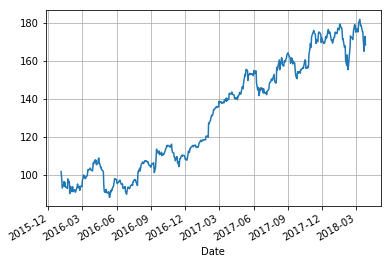

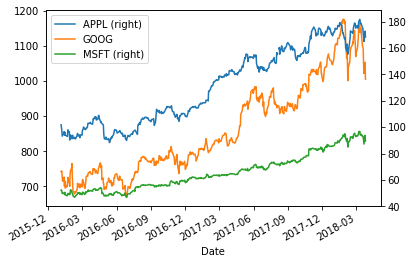

In [34]:
import matplotlib.pyplot as plt
# necessary for plot to appear in Jupyter
%matplotlib inline 
apple["Adj. Close"].plot(grid=True)
stocks.plot(secondary_y = ["APPL","MSFT"])

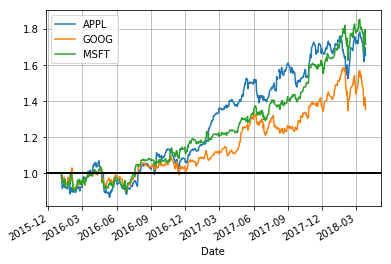

In [18]:
stock_return.plot(grid=True).axhline(y=1, color="black", lw=2)